
#**MAJOR PROJECT : EMPLOYEE ATTRITION**

-Deeksha Pandey  : 00401032021

-Tanisha Bansal  : 02901032021

-Suhani Jain     : 06001032021

##**PROJECT GOALS**

The project aims to read, interpret, analyse and manipulate the data of Employees and find-

1.   How different factors are related to Emplyee Attrition.
2.   Analysis of attrition rate through different models.
3.   Helps us to select the most accurate model to predict the chances of employee attrition.

##**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

##**DOWNLOADING DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Major'

In [ ]:
%cd '/content/drive/My Drive/Major'

/content/drive/My Drive/Major


In [ ]:
!kaggle datasets download -d patelprashant/employee-attrition

  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 7.22MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  employee-attrition.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


##**EXPLORATORY DATA ANALYSIS**

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Major/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
print("Shape of Data set: ")
print(data.shape)

data.describe()
print("Null values in the dataset")
data.isnull().values.any()     #checking for null values in the data set

Shape of Data set: 
(1470, 35)
Null values in the dataset


False

REPLACING STRING VALUES TO NUMERIC VALUES FOR ANALYSIS

In [ ]:
data['Attrition'].replace(['Yes','No'],[1, 0], inplace=True)
data['BusinessTravel'].replace(['Travel_Rarely','Travel_Frequently', 'Non-Travel'],[0,1,2], inplace=True)
data['Department'].replace(['Sales','Research & Development', 'Human Resources'],[0,1,2], inplace=True)
data['EducationField'].replace(['Life Sciences','Medical','Marketing','Technical Degree', 'Human Resources','Other'],[0,1,2,3,4,5], inplace=True)
data['Gender'].replace(['Male','Female'],[1, 0], inplace=True)
data['JobRole'].replace(['Sales Executive','Research Scientist','Laboratory Technician','Manufacturing Director','Healthcare Representative','Human Resources','Research Director','Manager','Sales Representative'],[0,1,2,3,4,5,6,7,8], inplace=True)
data['MaritalStatus'].replace(['Single','Married','Divorced'],[0,1,2], inplace=True)
data['OverTime'].replace(['Yes','No'],[1, 0], inplace=True)
data['Over18'].replace(['Y'],[1], inplace=True)

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


#**MODEL ANALYSIS**

##**RANDOM FOREST MODEL**

In [ ]:
X = data.drop('Attrition',axis='columns')
y = data.Attrition



We have performed the following operations -

*   Dependent variable is Attrition which we want to predict
*   Independent variables are all the remaining columns that helps to   determine Attrition rate.





SPLIT DATA INTO SEPARATE TRAINING AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

MODEL TRAINING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=70)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70)

SCORE CHECKING

In [ ]:
model.score(X_test, y_test)

0.8695652173913043

CONFUSION MATRIX

In [ ]:
y_predicted = model.predict(X_test)   #predict the results

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[311,   3],
       [ 45,   9]])

In [ ]:
tn,fp,fn,tp=confusion_matrix(y_test, y_predicted).ravel()
(tn,fp,fn,tp)

(311, 3, 45, 9)

In [ ]:
matrix=classification_report(y_test, y_predicted)       #PREPARING CLASSIFICATION REPORT
print("CLASSIFICATION REPORT: \n",matrix)

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       314
           1       0.75      0.17      0.27        54

    accuracy                           0.87       368
   macro avg       0.81      0.58      0.60       368
weighted avg       0.86      0.87      0.83       368



####**FUNCTION FOR CONFUSION MATRIX**

In [ ]:
def plot_confusion_matrix(y_pred):
    print('00: True Negatives\n01: False Positives\n10: False Negatives\n11: True Positives\n')
    conf_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.matshow(conf_matrix, cmap='Pastel1', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
    plt.xlabel('Predictions', fontsize=20)
    plt.ylabel('Actuals', fontsize=20)
    plt.title('Confusion Matrix', fontsize=20)
    plt.show()

00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



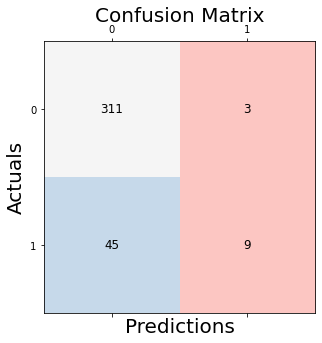

In [ ]:
plot_confusion_matrix(y_predicted)          #PLOTTING CONFUSION MATRIX

##**SUPPORT VECTOR MACHINE MODEL**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1 = data.drop(['Attrition'], axis='columns')
y1 = data.Attrition

We have performed the following operations -

*   Dependent variable is Attrition which we want to predict
*   Independent variables are all the remaining columns that helps to   determine Attrition rate.

SPLIT DATA INTO SEPARATE TRAINING AND TEST SET

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [ ]:
from sklearn.svm import SVC         #importing SVC module
model = SVC()

MODEL TRAINING

In [ ]:
model.fit(X1_train, y1_train)

SVC()

####**SCORE CHECKING**

In [ ]:
model.score(X1_test, y1_test)

0.8333333333333334

In [ ]:
y1_predicted = model.predict(X1_test)     #predict the results

###**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y1_test, y1_predicted)
cm

array([[245,   0],
       [ 49,   0]])

In [ ]:
tn,fp,fn,tp=confusion_matrix(y1_test, y1_predicted).ravel()
(tn,fp,fn,tp)

(245, 0, 49, 0)

In [ ]:
matrix=classification_report(y1_test, y1_predicted)       #CLASSIFICATION REPORT
print("CLASSIFICATION REPORT: \n",matrix)

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



####**FUNCTION FOR CONFUSION MATRIX**

In [ ]:
def plot_confusion_matrix(y_pred):
    print('00: True Negatives\n01: False Positives\n10: False Negatives\n11: True Positives\n')
    conf_matrix = confusion_matrix(y_true=y1_test,y_pred=y1_predicted)
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.matshow(conf_matrix, cmap='Set3', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
    plt.xlabel('Predictions', fontsize=20)
    plt.ylabel('Actuals', fontsize=20)
    plt.title('Confusion Matrix', fontsize=20)
    plt.show()

00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



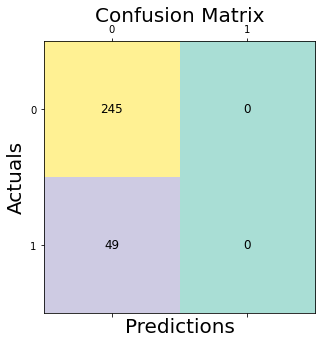

In [ ]:
plot_confusion_matrix(y1_predicted)       #plotting confusion matrix

##**NAIVE BAYE'S MODEL**

In [ ]:
from sklearn.naive_bayes import MultinomialNB     #importing MultinomialNB module
mnb = MultinomialNB(fit_prior=False)

In [ ]:
X2=data[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager' ]]
Y2=data['Attrition']

SPLIT DATA INTO SEPARATE TRAINING AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.2,random_state=2)
X2_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
285,37,0,1372,1,1,3,0,1,391,4,...,2,80,0,17,3,3,17,12,5,7
194,45,2,1195,1,2,2,1,1,264,1,...,4,80,1,22,1,3,20,8,11,8
323,28,0,1157,1,2,4,1,1,440,1,...,4,80,0,5,4,2,3,2,2,2
1015,34,1,560,1,1,4,5,1,1431,4,...,3,80,2,10,2,3,4,3,1,3
1003,25,0,949,1,1,3,3,1,1415,1,...,2,80,1,7,2,2,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,41,0,1276,0,2,5,0,1,625,2,...,2,80,1,22,2,3,18,16,11,8
299,51,0,1302,1,2,3,1,1,408,4,...,4,80,1,13,3,3,4,1,1,2
493,44,0,1112,2,1,4,0,1,665,1,...,2,80,0,10,1,4,2,2,0,2
527,32,0,929,0,10,3,2,1,722,4,...,4,80,0,10,2,2,10,7,0,8


###**MODEL TRAINING**

In [ ]:
mnb.fit(X2_train,Y2_train)

MultinomialNB(fit_prior=False)

In [ ]:
q = mnb.predict(X2_test)            #predicting the data
print(q)

[0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0
 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1
 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0]


###**SCORE CHECKING**

In [ ]:
mnb.score(X2_test,Y2_test)

0.5306122448979592

##**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
confusion_matrix(Y2_test,q)


array([[126, 120],
       [ 18,  30]])

In [ ]:
tn,fp,fn,tp=confusion_matrix(Y2_test,q).ravel()
(tn,fp,fn,tp)

(126, 120, 18, 30)

In [ ]:
matrix=classification_report(Y2_test,q)             #classification report
print("CLASSIFICATION REPORT : \n",matrix)

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.88      0.51      0.65       246
           1       0.20      0.62      0.30        48

    accuracy                           0.53       294
   macro avg       0.54      0.57      0.47       294
weighted avg       0.76      0.53      0.59       294



##**CONFUSION FUNCTION**

In [ ]:
def plot_confusion_matrix(y_pred):
    print('00: True Negatives\n01: False Positives\n10: False Negatives\n11: True Positives\n')
    conf_matrix = confusion_matrix(y_true=Y2_test,y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.matshow(conf_matrix, cmap='tab20', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
    plt.xlabel('Predictions', fontsize=20)
    plt.ylabel('Actuals', fontsize=20)
    plt.title('Confusion Matrix', fontsize=20)
    plt.show()

00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



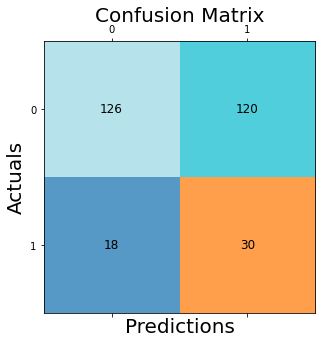

In [ ]:
plot_confusion_matrix(q)        #plotting confusion matrix

**Relative Comparison Of F1-score and Accuracy of 3 models**

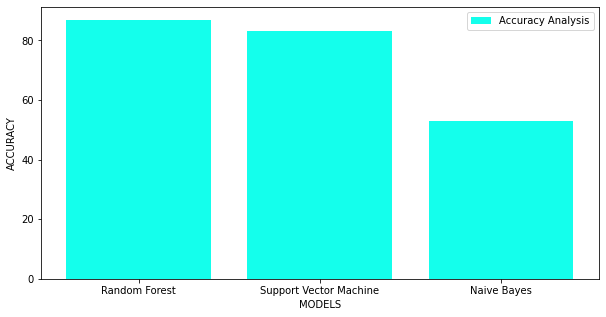

In [ ]:
plt.figure(figsize=(10,5))
xac=['Random Forest', 'Support Vector Machine', 'Naive Bayes']
yac=[86.9,83.33,53.06]
plt.bar(xac, yac, color='#14FFEC',label='Accuracy Analysis')
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')

plt.legend()
plt.show()

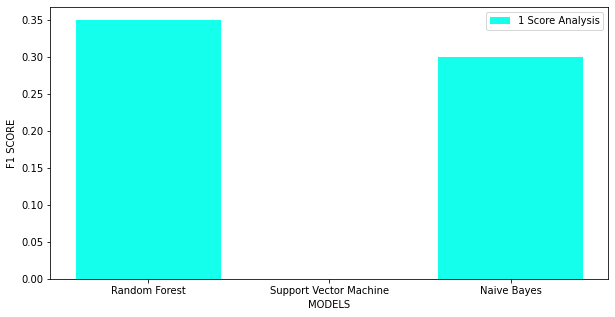

In [ ]:
plt.figure(figsize=(10,5))
xaf=['Random Forest', 'Support Vector Machine', 'Naive Bayes']
yaf=[0.35,0,0.30]
plt.bar(xaf, yaf, color='#14FFEC',label='1 Score Analysis')
plt.xlabel('MODELS')
plt.ylabel('F1 SCORE')

plt.legend()
plt.show()

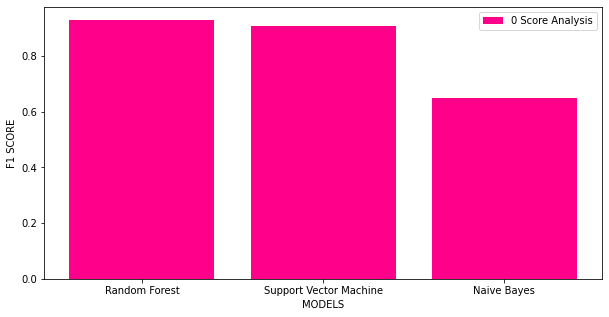

In [ ]:
plt.figure(figsize=(10,5))
xaf=['Random Forest', 'Support Vector Machine', 'Naive Bayes']
yaf2=[0.93,0.91,0.65]
plt.bar(xaf,yaf2, color='#FF008B', label='0 Score Analysis')
plt.xlabel('MODELS')
plt.ylabel('F1 SCORE')

plt.legend()
plt.show()

From the above graphs we have analysed that-
Random forest model has highest accuracy and highest F1 scores corresponding to 0 and 1 data values. Therefore, we come to a conclusion that Random Forest model is the best model.

**EXPLAIN IN BRIEF WHY YOU HAVE CHOSEN THIS MODEL**

Through Model analysis and relative study of f1-score and accuracy,we have found that random forest model is giving the best results.
THe model has following features which makes it a suitable choice for analysis:-

1.  It helps to perform both regression and classification tasks .

2.  It helps in handling large dataset easily .
  
3.  Our model yields a very good performance as indicated by the model accuracy which was found to be 87.77%

4.  We concluded that are model did a very good job in predicting if an employee with chosen parameters undergoes attrition or not.



##**Choose any 3 examples to show the accuracy of the predictions of employee attrition**

In [ ]:
model.predict([[33,1,1392,1,3,4,0,1,5,4,0,56,3,1,1,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0]])

array([0])

In [ ]:
model.predict([[22,2,1123,1,16,2,1,1,22,4,1,96,4,1,2,4,2,2935,7324,1,1,1,13,3,2,80,2,1,2,2,1,0,0,0]])

array([0])

In [ ]:
model.predict([[32,1,1005,1,2,2,0,1,8,4,1,79,3,1,2,4,0,3068,11864,0,1,0,13,3,3,80,0,8,2,2,7,7,3,6]])

array([0])